In [4]:
# dark theme extension https://stackoverflow.com/questions/46510192/change-the-theme-in-jupyter-notebook
import fingertips_py as ftp
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import os
pd.set_option('display.max_colwidth', -1)    # stop the column text truncating... 
pd.set_option("display.max_rows", None, "display.max_columns", None)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


## Test the API methods

In [53]:
mlc = ftp.get_data_for_indicator_at_all_available_geographies(285)
print(mlc.shape)
mlc[(mlc['Area Type']=='GP')].head(5)
# we can see from below that the QOF dataset is available

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(90537, 26)


,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
2,285,Asthma: QOF prevalence (all ages),E92000001,England,A81001,The Densham Surgery,GP,Persons,All ages,NaN,NaN,2009/10,7.228626,6.480871,8.055226,NaN,NaN,301,4164,NaN,NaN,Higher,Not compared,20090000,NaN,NaN
3,285,Asthma: QOF prevalence (all ages),E92000001,England,A81002,Queens Park Medical Centre,GP,Persons,All ages,NaN,NaN,2009/10,7.518943,7.166613,7.887123,NaN,NaN,1548,20588,NaN,NaN,Higher,Not compared,20090000,NaN,NaN
4,285,Asthma: QOF prevalence (all ages),E92000001,England,A81004,Bluebell Medical Centre,GP,Persons,All ages,NaN,NaN,2009/10,5.597872,5.122754,6.114216,NaN,NaN,463,8271,NaN,NaN,Similar,Not compared,20090000,NaN,NaN
5,285,Asthma: QOF prevalence (all ages),E92000001,England,A81005,Springwood Surgery,GP,Persons,All ages,NaN,NaN,2009/10,4.766683,4.320375,5.256564,NaN,NaN,380,7972,NaN,NaN,Lower,Not compared,20090000,NaN,NaN
6,285,Asthma: QOF prevalence (all ages),E92000001,England,A81006,Tennant Street Medical Practice,GP,Persons,All ages,NaN,NaN,2009/10,6.219167,5.806942,6.658586,NaN,NaN,769,12365,NaN,NaN,Similar,Not compared,20090000,NaN,NaN


## Load in the Data

In [47]:
##################################################################################################
# buzzwords - to 'search' our indicator df for  
# asthma - done 
# lower respiratory tract infections - done 
# pneumonia - done 
# respiratory - done 
# chronic obstructive pulmonary disease - done 

### tables broken down by ailment, next --> arrange into indicdence, mortality rate, hospital admissions.

# 1205  Lung cancer registrations
# 1203	Mortality rate from lung cancer



##################################################################################################

# returned indicators from our searched values

### Prevalance...  -- maybe lung cancer can surplus Quality framework dataset... 
# 1205  Lung cancer registrations
# 253		COPD: QOF prevalence (all ages)  --> check out...   

### mortality
# 1203	Mortality rate from lung cancer
# 93643	Mortality rate from COPD as a contributory cause
# 1204	Mortality rate from chronic obstructive pulmonary disease
# 40701	Under 75 mortality rate from respiratory disease
# 93644	Mortality rate from asthma
# 93641	Mortality rate from pneumonia (all mentions)
# 93640	Mortality rate from pneumonia (underlying cause)


### admissions 
# 92302	Emergency hospital admissions for COPD
# 93577	Emergency hospital admissions for COPD, all ages
# 93575	Emergency hospital admissions for respiratory disease
# 92253	Admissions for lower respiratory tract infections in children aged 2, 3 and 4 years
# 192972	Admissions for lower respiratory tract infections in children aged 2, 3 and 4 years
# 92971	Admissions for lower respiratory tract infections in infants aged 1 year
# 92252	Admissions for lower respiratory tract infections in infants aged 1 year
# 92251	Admissions for lower respiratory tract infections in infants aged under 1 year
# 92970	Admissions for lower respiratory tract infections in infants aged under 1 year
# 93573	Emergency hospital admissions for asthma in adults (aged 19 years and over)
# 90810	Hospital admissions for asthma (under 19 years)
# 92780	Hospital admissions for asthma (under 19 years) -- need to see which one is relevant
# 93574	Emergency hospital admissions for pneumonia


### need to check 
# 90612 COPD002: Diagnosis conf. by spirometry (den. incl. exc.) - need to check 



In [48]:
# get a df of all indicators available in Fingertips
indicator_df = ftp.get_metadata_for_all_indicators_from_csv()
interested_indicators = indicator_df[['Indicator ID', 'Indicator']].sort_values(by='Indicator')

In [45]:
# We search the indicator_df here with buzzwords and return indicators want to use in our analysis
interested_indicators[interested_indicators['Indicator'].str.lower().str.contains('lung'.lower())].head(100)

,Indicator ID,Indicator
1171,93237,"Incidence of lung cancer, standardised incidence ratio"
59,1205,Lung cancer registrations
55,1203,Mortality rate from lung cancer
584,91350,"Two-week wait referrals for suspected lung cancer (Number per 100,000 population)"
803,92612,"Two-week wait referrals for suspected lung cancer (Number per 100,000 population). Five years combined data."


In [50]:
# concat indicator data, output as a CSV file
def _concat_output_data(indicator_ids, name):
    directory = './data_output/{0}'.format(name)

    if not os.path.exists(directory):
        os.makedirs(directory)
        
    lst_df = []
    for id in indicator_ids:
        tmp_d = ftp.get_data_for_indicator_at_all_available_geographies(id)
        lst_df.append(tmp_d)
        
    tmp_concat = pd.concat(lst_df, axis=0, ignore_index=True)
    
    tmp_concat.to_csv(directory + '/' +  name + '.csv')
    
    # free memory
    tmp_concat= None 
    lst_df = None


In [ ]:
# navigate through API for prevalence indicators and concat the prevalence dataset, commented out as we have already completed
# save concatenated set to CSV
# _concat_output_data([1205,253, 285], 'prevalance_supplement')

In [ ]:
# # navigate through API for mortality indicators and concat the mortality_rate dataset, commented out as we have already completed
# save concatenated set to CSV
# _concat_output_data([1203,93643, 1204, 40701, 93644, 93641, 93640], 'mortality_rate')

In [ ]:
# navigate through API for hospital indicators and concat the hospital_admissions dataset, commented out as we have already completed
# save concatenated set to CSV
# _concat_output_data([92302,93577, 93575, 92253, 192972, 92971, 92252, 92251, 92970, 93573, 90810, 92780, 93574], 'hospital_admissions')

# Preliminary Analysis on Mortality, Dataset)

In [54]:
# some basic checks 

def preliminary_data_checks(df, name):
    
    print('Running analysis checks on the {0} DataFrame...'.format(name))
    print('\n\n')
    
    print('the shape of the df is as follows: ', df.shape)
    print('\n\n')

    print('Check 1. Columns for the {0} DataFrame as as follows: {1} \n'.format(name, list(df.columns)))
    print('\n\n')

    print('Check 2. The {0} DataFrame column datatypes are as follows: {1}'.format(name, df.dtypes))
    print('\n\n')
    
    print('Check 1a. NULL values in Columns for the {0} DataFrame as as follows: \n'.format(name))
    print(df.isna().sum())
    print('\n\n')
    
    indicators = df['Indicator Name'].unique()
    print('there are {0} diifferent indicators in this set, they are as follows:'.format(len(indicators)))
    for indicator in indicators:
        print(indicator)
        
    print('\n\n')
    
    print('data is prevalent for the following years (individual indicator analysis is required...) \n')
    print(sorted(df['Time period Sortable'].unique()))
#     print(sorted(tmp_df['Area Type'].unique()))


In [5]:
mortality_df = pd.read_csv('./data_output/mortality_rate/mortality_rate.csv')
prevalance_supplement_df = pd.read_csv('./data_output/prevalance_supplement/prevalance_supplement.csv')
hospital_admissions_df = pd.read_csv('./data_output/hospital_admissions/hospital_admissions.csv')


/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10,11,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [99]:
preliminary_data_checks(mortality_df, 'mortality')

Running analysis checks on the mortality DataFrame...



the shape of the df is as follows:  (228912, 27)



Check 1. Columns for the mortality DataFrame as as follows: ['Unnamed: 0', 'Indicator ID', 'Indicator Name', 'Parent Code', 'Parent Name', 'Area Code', 'Area Name', 'Area Type', 'Sex', 'Age', 'Category Type', 'Category', 'Time period', 'Value', 'Lower CI 95.0 limit', 'Upper CI 95.0 limit', 'Lower CI 99.8 limit', 'Upper CI 99.8 limit', 'Count', 'Denominator', 'Value note', 'Recent Trend', 'Compared to England value or percentiles', 'Compared to percentiles', 'Time period Sortable', 'New data', 'Compared to goal'] 




Check 2. The mortality DataFrame column datatypes are as follows: Unnamed: 0                                  int64  
Indicator ID                                int64  
Indicator Name                              object 
Parent Code                                 object 
Parent Name                                 object 
Area Code                                 

In [72]:
# grouped = mortality_df.groupby(['Time period Sortable', 'Indicator Name']).size().reset_index().rename(columns={0:'nr_records'})


# we should use count instead, as we do not want to include the null values with 'size()'
# we pick any column (Area codem, whatever, they will all contain the same vlaue the same)
grouped = mortality_df.groupby(['Time period Sortable', 'Indicator Name']).count()['Area Code'].reset_index().rename(columns={'Area Code':'nr_records'})

# get rid of extra 0 and cast to int for now...
grouped['Time period Sortable'] = (grouped['Time period Sortable']/10000).astype(int)
grouped.head()


,Time period Sortable,Indicator Name,nr_records
0,2001,Mortality rate from chronic obstructive pulmonary disease,4533
1,2001,Mortality rate from lung cancer,3015
2,2001,Under 75 mortality rate from respiratory disease,4266
3,2002,Mortality rate from chronic obstructive pulmonary disease,4533
4,2002,Mortality rate from lung cancer,3015


In [58]:
piv = grouped.pivot(
index = 'Time period Sortable',
columns='Indicator Name',
values='nr_records'
)
piv.head(5)

Indicator Name,Mortality rate from COPD as a contributory cause,Mortality rate from asthma,Mortality rate from chronic obstructive pulmonary disease,Mortality rate from lung cancer,Mortality rate from pneumonia (all mentions),Mortality rate from pneumonia (underlying cause),Under 75 mortality rate from respiratory disease
Time period Sortable,,,,,,,
2001,NaN,NaN,4533.0,3015.0,NaN,NaN,4266.0
2002,NaN,NaN,4533.0,3015.0,NaN,NaN,4266.0
2003,NaN,NaN,4533.0,3015.0,NaN,NaN,4266.0
2004,NaN,NaN,4533.0,3015.0,NaN,NaN,4266.0
2005,NaN,NaN,4533.0,3015.0,NaN,NaN,4266.0


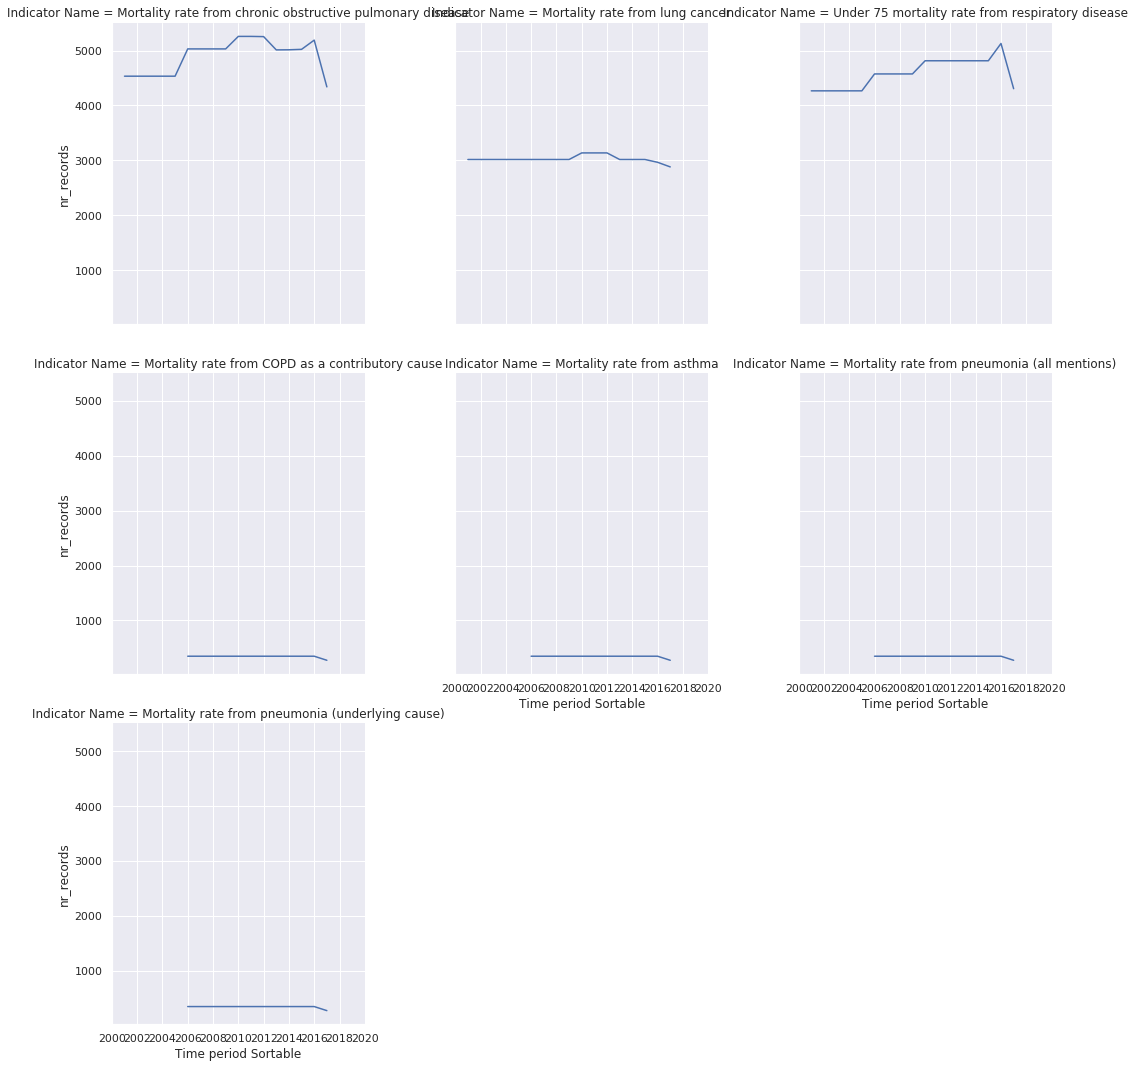

In [59]:
# lets see the number of rows/records in our concatenated file
# pivot doesnt seem to be working (maybe set is too large, next we will try facetgrid with seaborn)
m = sns.FacetGrid(grouped, col='Indicator Name', col_wrap=3, height=5)
m.map(sns.lineplot, 'Time period Sortable', 'nr_records')
m.set(xticks=np.arange(2000, 2022, 2))

In [62]:
# the above =shows that we have consistent file/row numbers for the mortality rate
# what is the data window for each mortality indicator? 

for indicator in grouped['Indicator Name'].unique():
    t_df = grouped[grouped['Indicator Name'] == indicator]
    max_year = t_df['Time period Sortable'].max()
    min_year = t_df['Time period Sortable'].min()

    print('Indicator statistics for {0}:'.format(indicator))
    
    print('First Data Points: {0} the last data points {1} \n'.format(
        min_year, max_year)
    )


Indicator statistics for Mortality rate from chronic obstructive pulmonary disease:
First Data Points: 2001 the last data points 2017 

Indicator statistics for Mortality rate from lung cancer:
First Data Points: 2001 the last data points 2017 

Indicator statistics for Under 75 mortality rate from respiratory disease:
First Data Points: 2001 the last data points 2017 

Indicator statistics for Mortality rate from COPD as a contributory cause:
First Data Points: 2006 the last data points 2017 

Indicator statistics for Mortality rate from asthma:
First Data Points: 2006 the last data points 2017 

Indicator statistics for Mortality rate from pneumonia (all mentions):
First Data Points: 2006 the last data points 2017 

Indicator statistics for Mortality rate from pneumonia (underlying cause):
First Data Points: 2006 the last data points 2017 



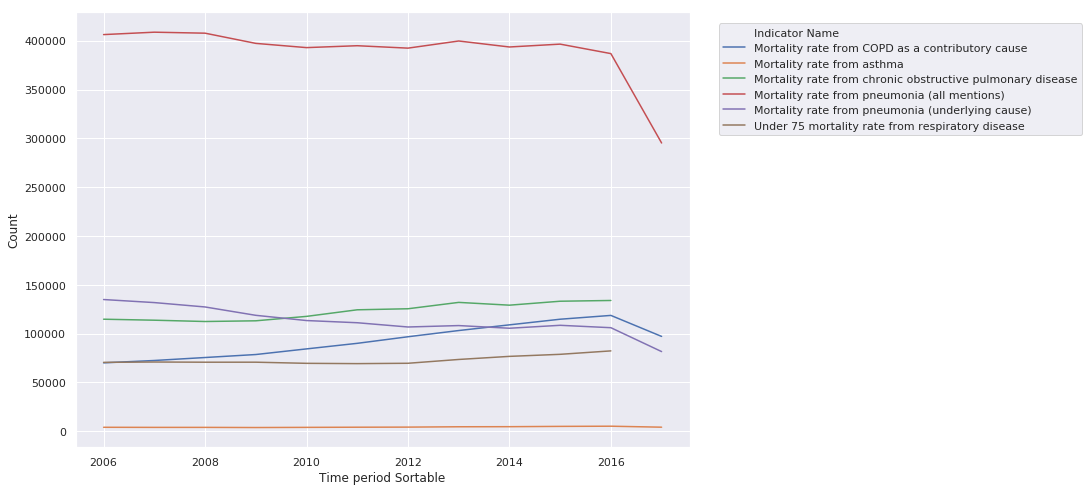

In [64]:
# next, make some plots on the mortality rate, remember to keep the most granulat area type, which is CCG for our set
# lets see how the mortality rate changes over time. 

# remove england statistics, we want CCGs
special = mortality_df[(mortality_df['Area Name'] != 'England')]

# filter out male and female results, for now
special = special[special['Sex'] == 'Persons']

# limit to CCGS (using LOC with isin())
special = special.loc[special['Area Type'].isin(['CCGs (since 4/20)','CCGs (2019/20)'])]

# Important graph is to plot the different indicators values by year (so use a sum instead of count)
grouped_sum = special.groupby(['Time period Sortable', 'Indicator Name']).sum()['Count'].reset_index()

# get rid of extra 0 and cast to int for now, for the sortable time period...
grouped_sum['Time period Sortable'] = (grouped_sum['Time period Sortable']/10000).astype(int)

# we will use seaborn here (for pandas might need a pivot table, where we break out indicator name)
# set the figure size with rc argument for seaborn (stack overflow)
sns.set(rc={'figure.figsize':(11,8)})

sns.lineplot(data=grouped_sum, x='Time period Sortable', y='Count', hue='Indicator Name', legend='full')

# Put the legend out of the figure using matlibplot (stackoverflow...)
plt.legend((bbox_to_anchor)=(1.03,1), loc=2, borderaxespad=1)

plt.show()

In [65]:
def plot_indicator_df(df):
    # Important graph is to plot the different indicators values by year (so use a sum instead of count)
    grouped_sum = df.groupby(['Time period Sortable', 'Indicator Name', 'Indicator ID']).sum()['Count'].reset_index()

    # get rid of extra 0 and cast to int for now...
    grouped_sum['Time period Sortable'] = (grouped_sum['Time period Sortable']/10000).astype(int)
#     grouped_sum['Count'] = grouped_sum['Count'].astype(int)

    # we will use seaborn here (for pandas will need another pivot table, where we break out indicator name)
    # set the figure size with rc argument for seaborn (stack overflow)
    sns.set(rc={'figure.figsize':(11,8)})

    sns.lineplot(data=grouped_sum, x='Time period Sortable', y='Count', hue='Indicator Name', legend='full')

    # Put the legend out of the figure using matlibplot (stackoverflow...)
    plt.legend((bbox_to_anchor)=(1.03,1), loc=2, borderaxespad=1)

    plt.show()

# Main Analysis on All Concatenated Datasets (Admissions, Mortality, Prevalance)

we will now answer the dataset detailing questions:
    

### 1. How many data sources are you using? Where are you getting the data from? Is it publicly available? 
Who provides the data? What challenges might be present based on your answers?

**Answer**
For Fingertips, we are using the publicly available 'fingertips_py' python package: https://fingertips-py.readthedocs.io/en/latest/ to download a SERIES (PUT FINAL NUMBER) of indicators. Preliminary findings indicate that data is on tghe yearly level, for the mortalities dataset we have a window between 2006 - 2017 for all indicators.



### 2. How large are your data sets? Do you foresee any hardware restrictions in analyzing your data? Will you need to use creative methods to handle your data (working in smaller batches, outsourcing computing etc.)

In [31]:
print('answer: we have concatenated the fingertips indicators into three datasets: mortality_df, prevalance_supplement_df, hospital_admissions_df')

print('the size is as follows: ')
print('mortality: ', mortality_df.shape)
print('prevalance_supplement_df: ', prevalance_supplement_df.shape)
print('hospital_admissions_df: ', hospital_admissions_df.shape)

print('At the time of writing, we do not see a problem with analysing the sets, as our model will take a subset of rows based on CGP area location. In addition, our important field (count) is aggregated to the year level.')

mortality_df.head()

answer: we have concatenated the fingertips indicators into three datasets: mortality_df, prevalance_supplement_df, hospital_admissions_df
the size is as follows: 
mortality:  (228912, 27)
prevalance_supplement_df:  (157586, 27)
hospital_admissions_df:  (55900, 28)
At the time of writing, we do not see a problem with analysing the sets, as our model will take a subset of rows based on CGP area location. In addition, our important field (count) is aggregated to the year level.


,Unnamed: 0,Indicator ID,Indicator Name,Parent Code,Parent Name,Area Code,Area Name,Area Type,Sex,Age,Category Type,Category,Time period,Value,Lower CI 95.0 limit,Upper CI 95.0 limit,Lower CI 99.8 limit,Upper CI 99.8 limit,Count,Denominator,Value note,Recent Trend,Compared to England value or percentiles,Compared to percentiles,Time period Sortable,New data,Compared to goal
0,0,1203,Mortality rate from lung cancer,NaN,NaN,E92000001,England,England,Male,All ages,NaN,NaN,2001 - 03,93.446004,92.596587,94.301109,NaN,NaN,49011.0,72886051.0,NaN,NaN,Not compared,Not compared,20010000,NaN,NaN
1,1,1203,Mortality rate from lung cancer,NaN,NaN,E92000001,England,England,Male,All ages,County & UA deprivation deciles in England (IMD2010),Most deprived decile (IMD2010),2001 - 03,129.952898,126.203319,133.782087,NaN,NaN,4952.0,6435808.0,NaN,NaN,Worse,Not compared,20010000,NaN,NaN
2,2,1203,Mortality rate from lung cancer,NaN,NaN,E92000001,England,England,Male,All ages,County & UA deprivation deciles in England (IMD2010),Second most deprived decile (IMD2010),2001 - 03,113.045523,109.214648,116.972968,NaN,NaN,3528.0,5129660.0,NaN,NaN,Worse,Not compared,20010000,NaN,NaN
3,3,1203,Mortality rate from lung cancer,NaN,NaN,E92000001,England,England,Male,All ages,County & UA deprivation deciles in England (IMD2010),Third more deprived decile (IMD2010),2001 - 03,122.301265,118.496771,126.193157,NaN,NaN,4238.0,4944789.0,NaN,NaN,Worse,Not compared,20010000,NaN,NaN
4,4,1203,Mortality rate from lung cancer,NaN,NaN,E92000001,England,England,Male,All ages,County & UA deprivation deciles in England (IMD2010),Fourth more deprived decile (IMD2010),2001 - 03,109.243674,106.086345,112.468933,NaN,NaN,4824.0,6391084.0,NaN,NaN,Worse,Not compared,20010000,NaN,NaN


### 3.  What variables do you have in your data? What data dypes do you have?

In [103]:
print('The variables for mortality_df, prevalance_supplement_df, hospital_admissions_df are consistent and follow the convention: \n')
print('mortality: ', mortality_df.dtypes)
print('\n')

# print('hospital_admissions_df: ', hospital_admissions_df.dtypes)
# print('\n\n')


print(hospital_admissions_df.columns == prevalance_supplement_df.columns )
print(prevalance_supplement_df.columns ==hospital_admissions_df.columns)
print('\n\n')


print('''Fields of interest are: Indicator Name, Area Name, Area Type, Time Period Sortable/Time Period Count, 
Denominator. Additional fields of interest for model breakdown: Age, Sex''')

print('potential problem with lung cancel registrations (no denominator.... I dont think we can use this set )')


print('largest issue is that we do not have GP/hospital breakdown with this set.')

The variables for mortality_df, prevalance_supplement_df, hospital_admissions_df are consistent and follow the convention: 

mortality:  Unnamed: 0                                  int64  
Indicator ID                                int64  
Indicator Name                              object 
Parent Code                                 object 
Parent Name                                 object 
Area Code                                   object 
Area Name                                   object 
Area Type                                   object 
Sex                                         object 
Age                                         object 
Category Type                               object 
Category                                    object 
Time period                                 object 
Value                                       float64
Lower CI 95.0 limit                         float64
Upper CI 95.0 limit                         float64
Lower CI 99.8 limit            

### 4.  How complete is your data? How will you be addressing NAs?


In [147]:

for df, name in [[mortality_df, 'mortality'],[ prevalance_supplement_df, 'prevalence'], [ hospital_admissions_df, 'hospital']]:
    
    print('Check 1a. NULL values in Columns for the {0} DataFrame as as follows: \n'.format(name))
    print(df.isna().sum())
    print('\n\n')
    print('Reasons for Nan values are specified here: ', df[df['Count'].isna()]['Value note'].unique())
    print('\n\n')

    
    
    
# There are NaNs in some CCG fields across all years. 
# The documentation (https://www.ons.gov.uk/file?uri=/methodology/methodologytopicsandstatisticalconcepts/disclosurecontrol/healthstatistics/confidentialityguidanctcm77181864.pdf) 
# explains that cell suppression has taken place, in CCGs recording low numbers of indicators (to avoid identification of paitents)
# Secondary supression also occurs in the same field for CCGs (to avoid disclosure by differencing) 


print('For supressed CCGs, we should potentially drom them from our analysis (as no data available across range'),

print('if missing data due to malfunction e.g. 1 year, - we could interpolate based on the values before after, or the CGP values around this area..')

print('potential problem with lung cancel registrations (no denominator.... I dont think we can use this set ) - it might not have the range anyway...')



Check 1a. NULL values in Columns for the mortality DataFrame as as follows: 

Unnamed: 0                                  0     
Indicator ID                                0     
Indicator Name                              0     
Parent Code                                 5337  
Parent Name                                 5337  
Area Code                                   0     
Area Name                                   0     
Area Type                                   0     
Sex                                         0     
Age                                         0     
Category Type                               218652
Category                                    218652
Time period                                 0     
Value                                       2692  
Lower CI 95.0 limit                         2692  
Upper CI 95.0 limit                         2692  
Lower CI 99.8 limit                         183528
Upper CI 99.8 limit                         183528
Coun

Plotting incident graph for mortality dataset.



FYI - NO FILTERING OR RESTRICTION HAVE BEEN APPLIED ON THE GRAPHS BELOW, ASSUME THEY NEED FURHTER ANALYSIS AND A CORRECTNESS CHECK





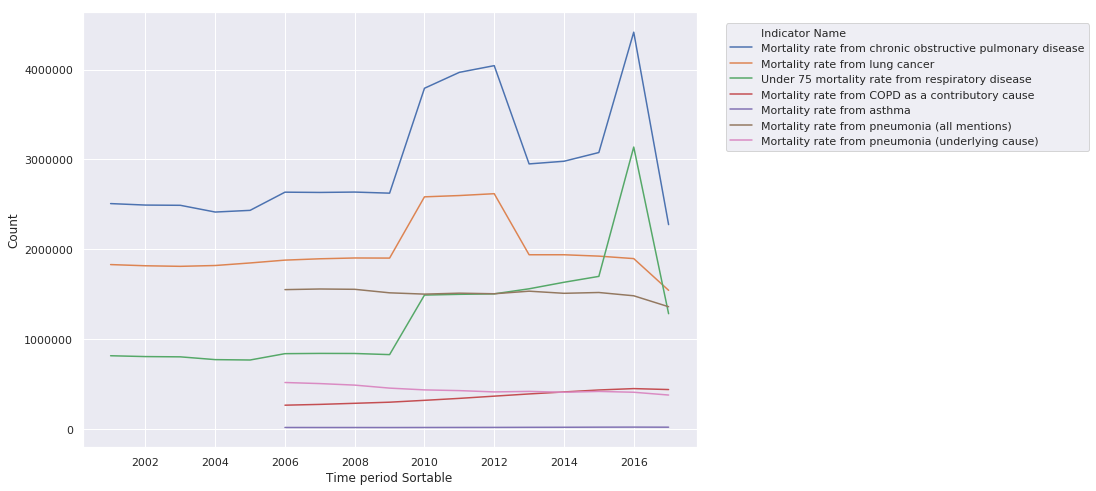




Plotting incident graph for prevalence dataset.



FYI - NO FILTERING OR RESTRICTION HAVE BEEN APPLIED ON THE GRAPHS BELOW, ASSUME THEY NEED FURHTER ANALYSIS AND A CORRECTNESS CHECK





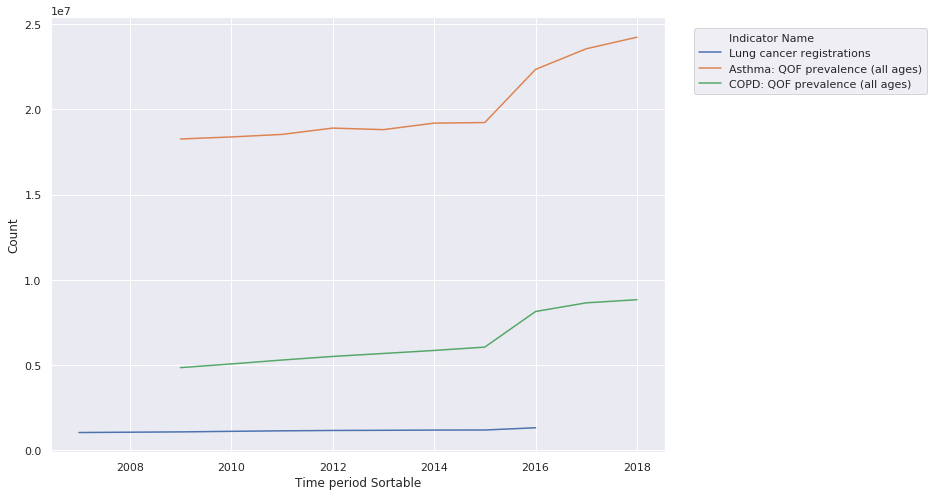




Plotting incident graph for hospital dataset.



FYI - NO FILTERING OR RESTRICTION HAVE BEEN APPLIED ON THE GRAPHS BELOW, ASSUME THEY NEED FURHTER ANALYSIS AND A CORRECTNESS CHECK





/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


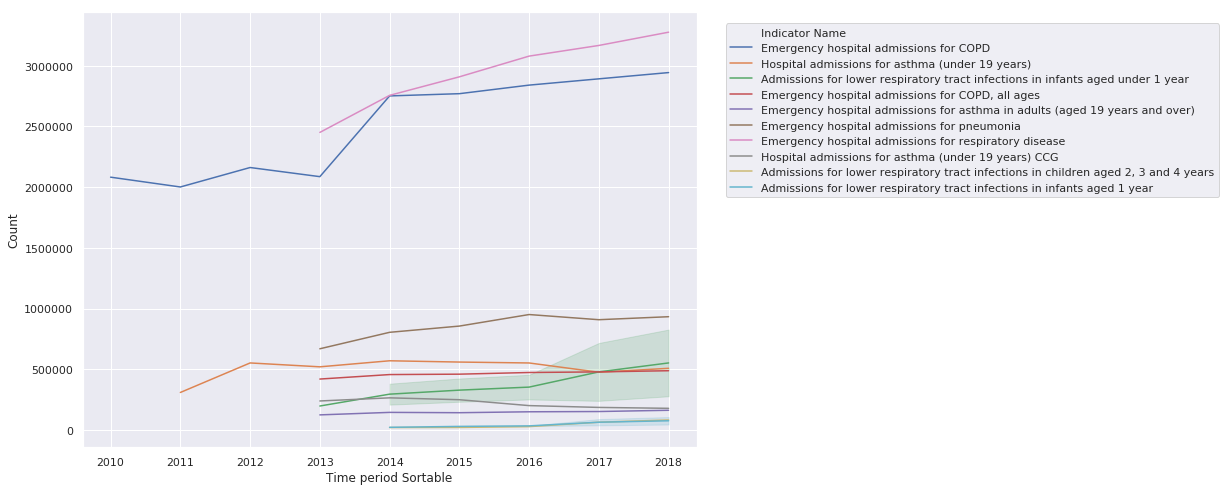

In [66]:
# plot a graph for the datasets to see data window:
# FYI - NO FILTERING OR RESTRICTION HAVE BEEN APPLIED ON THE GRAPHS BELOW, ASSUME THEY NEED FURHTER ANALYSIS AND 
# A CORRECTNESS CHECK

for df, name in [[mortality_df, 'mortality'],[ prevalance_supplement_df, 'prevalence'], [ hospital_admissions_df, 'hospital']]:
    print('Plotting incident graph for {0} dataset.'.format(name))
    print('\n\n')
    
    print('FYI - NO FILTERING OR RESTRICTION HAVE BEEN APPLIED ON THE GRAPHS BELOW, ASSUME THEY NEED FURHTER ANALYSIS AND A CORRECTNESS CHECK')
    print('\n\n')

    plot_indicator_df(df)
    print('\n\n')



## Q5-8: Remaining Questions

**FYI, from graphs above, dropped "Emergency hospital admissions for bronchiolitis in children aged under 2 years"** indicator.. only 1 year available 

5. Do you need more data at this point?
   * **Answer** three notable issues with this dataset are 
   * Datasets are not broken down by hospital/GP... this means they cannot work with the radius/distance approach
   * Hospital admissions/prevalence supplement sets are yearly, mortality is bi-yearly
   
   
   * Hospital admissions 
     * do not go back further than 2013  aside from Asthma U19 (2011) & COPD (2010) and all end in 2018, these give us 7 and 8 points for our model respectively. 
     * Asthma hospital admissions (under 19) has two variants; 90810 is based on older definition of CCP, 92780 (2013 onwards) is the up-to-date CCP one 
     * SAME for COPD admission  - 92302 (2010 onwards) is the older definition, 93577 is the up-to-date CCG definition
   * Mortality: 
     * I believe dataset rows are aggregated for two years (2001 - 2003, 2002 - 2004... 2017-2019).. we may need to aggrgate the pollution for 2 years for mortality indicators. See original "Time Period" field. 
   
   * Our three prevelance supplement datasets, 
       * COPD: QOF prevalence (all ages), broken down by GP, 2009 - 2019 data, this should be identical to NHS set.
       * Asthma QOF prevalence (all ages), broken down by GP, 2009 - 2019 data, this should be identical to NHS set.
       * Both prevalence sets show increase in 2015 (more collection?)
       * Lung Cancer registrations is broken down by "County & UA" (not CCP) and is in two - year intervals. - I recommend we disregard the set.
    * Recommendation: The team should double check whether data is really bi-annual for Mortality, if so, search for annual data as a minimum




6. What keys exist for record linkaging if you need to do so in the future?
   * Time period Sortable
   * Area Name (CCG - we can link this to pollutant station location, & e.g. map out which station lies in which CCG)


7. What are the most interesting data points?
   * Prevalence supplement - spike in 2015, further investigation required 
   


8. Are there any data points that you don't have yet that you would like or need for your analysis?
   * Annual points for mortality dataset. 

In [ ]:
# Drop the child bronchitis row, not useful ( only 1 year of data)
# I removed 93576 from the original concentation above, so we will not require this step again.

# 93576 --> is the corresponding Indicator ID
# print shape before & after to ensure we have dropped the rows
# print(hospital_admissions_df.shape)
# print(hospital_admissions_df['Indicator ID'].unique())

# hospital_admissions_df = hospital_admissions_df.drop(hospital_admissions_df[hospital_admissions_df['Indicator ID'] == 93576].index)

# print(hospital_admissions_df.shape)
# print(hospital_admissions_df['Indicator ID'].unique())

# tmp = hospital_admissions_df.copy()


## Extra Fixes 

In [69]:
# fix for the two asthma indicators (same, but renamed in later data sets)
def func(row):
    if row['Indicator ID'] == 92780:        
        return 'Hospital admissions for asthma (under 19 years) CCG'
    else:
        return row['Indicator Name']


In [70]:
# use apply to rename the extra asthma dataset. 
hospital_admissions_df['Indicator Name'] = hospital_admissions_df.apply(func, axis=1)
hospital_admissions_df.shape

(55900, 28)

In [71]:
hospital_admissions_df['Indicator Name'].unique()

array(['Emergency hospital admissions for COPD',
       'Emergency hospital admissions for COPD, all ages',
       'Emergency hospital admissions for respiratory disease',
       'Admissions for lower respiratory tract infections in children aged 2, 3 and 4 years',
       'Admissions for lower respiratory tract infections in infants aged 1 year',
       'Admissions for lower respiratory tract infections in infants aged under 1 year',
       'Emergency hospital admissions for asthma in adults (aged 19 years and over)',
       'Hospital admissions for asthma (under 19 years)',
       'Hospital admissions for asthma (under 19 years) CCG',
       'Emergency hospital admissions for pneumonia'], dtype=object)